In [6]:
import sys
print('Pyhton: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {} '.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))


Pyhton: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Scipy: 1.5.0
Numpy: 1.18.5 
Matplotlib: 3.2.2
Pandas: 1.0.5
Sklearn: 0.23.1


In [9]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [14]:
names=['sepel-length','sepel-width','petal-length','petal-width','class']
dataset=pandas.read_csv('iris.data',names=names)
#No of rows & cols
print(dataset.shape)


(150, 5)


In [15]:
print(dataset.head(30))# 30first data

    sepel-length  sepel-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [16]:
#Summary of each attribute
print(dataset.describe())


       sepel-length  sepel-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [17]:
#No of instances belonging to each class
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


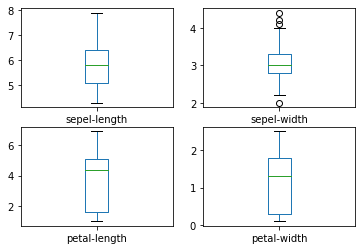

In [20]:
# some visulization
# we will create 2 diff types of plot-univariate(understand each attribute) and
#multi-variate(to understand reln b/w each attribute) plot

#1.univa=Box and viscous plot to get idea of i/p
dataset.plot(kind='box', subplots=True , layout=(2,2), sharex=False , sharey=False)
#sharex/y=false as dont want to share it along any x and y to any visualization
plt.show()


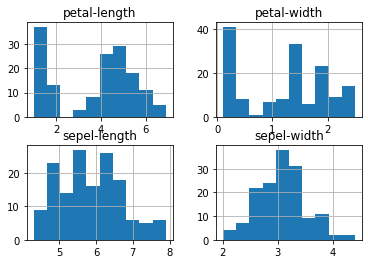

In [21]:
#Creating histogram to get more clear idea of i/p
dataset.hist()
plt.show()

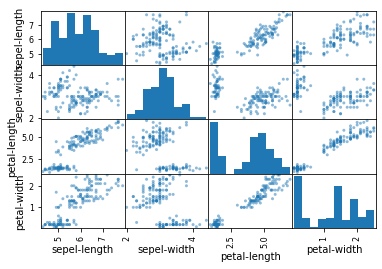

In [22]:
#Multivariate plot-to seee the interaction b/w the diff variable
#for creating Scatter plot we need scatter matrix
scatter_matrix(dataset)
plt.show()

In [25]:
#Let's create our dataset and estimate accuracy based on unseen data
#we will be creating some model and estimating the accuracy
#Validation dataset =Training dataset ,will be used to train our data set
#We will split our data - 1.Training(80% will be used here) 2.Unseendata
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=6 #This method seed sets the integer starting value used in generating random values
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
                            #Selecting some model and splting value of X and Y



In [26]:
#Now we create test harness:split data 10 parts,train on 9 part and test in 1 part
seed=6
scoring='accuracy'#Using metric of accuracy to evaluate the model-
#It is ratio of correctly predicted instances/total instances in the dataset X


In [31]:
#Building the model-5 diff models 
#Evaluate model in each turn
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#evaluate each model in turn-to check the best accuracy of which model
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
    


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

LR: 0.950000 (0.076376)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.958333 (0.041667)
NB: 0.966667 (0.055277)
SVM: 0.950000 (0.076376)


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
#Since LDA gives best accuracy-it will be best for PREDICTION